# PREDICTION PRIX MAISON

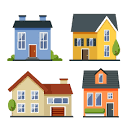

# Sommaire

## I. Importation
### 1. Bibliothèques
### 2. Fichier

## II. Analyse exploratoire des données
### 1. Exploration du fichier
### 2. Exploration des variables
### 3. Feature Engineering

## III. Modélisation
### 1. Préparation des données
### 2. Modélisation

# 

## I. Importation

### 1. Bibliothèques

In [1]:
%%capture

# Bibliothèques standards

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime
import shap

import time
import warnings
warnings.filterwarnings('ignore')

# Bibliothèques modélisation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optimisation du modèle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

# 

### 2. Fichier

In [2]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## II. Analyse exploratoire des données
### 1. Exploration du fichier

In [3]:
# Description des variables

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


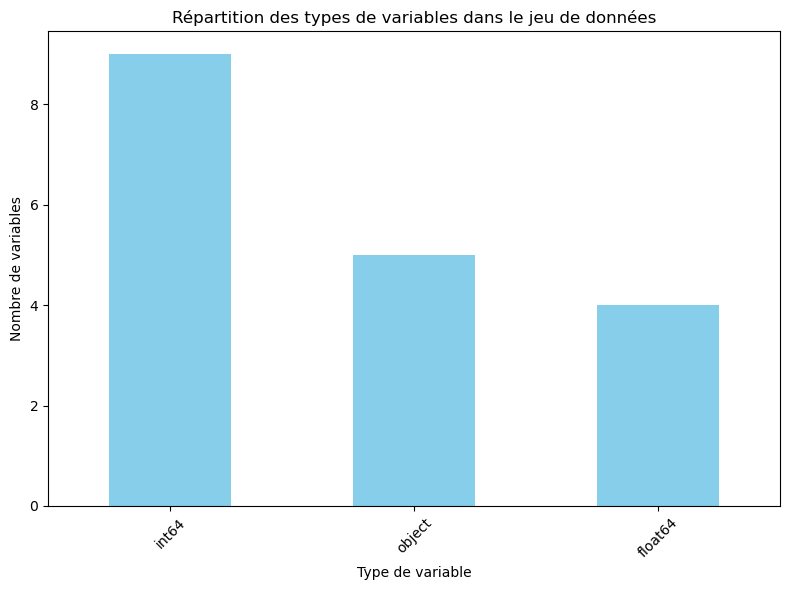

In [4]:
# Créer une liste pour stocker les types de variables
variable_types = df.dtypes.tolist()

# Compter le nombre de variables de chaque type
variable_type_counts = pd.Series(variable_types).value_counts()

# Créer un graphique à barres pour représenter les types de variables
plt.figure(figsize=(8, 6))
variable_type_counts.plot(kind='bar', color = 'skyblue')
plt.title("Répartition des types de variables dans le jeu de données")
plt.xlabel("Type de variable")
plt.ylabel("Nombre de variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

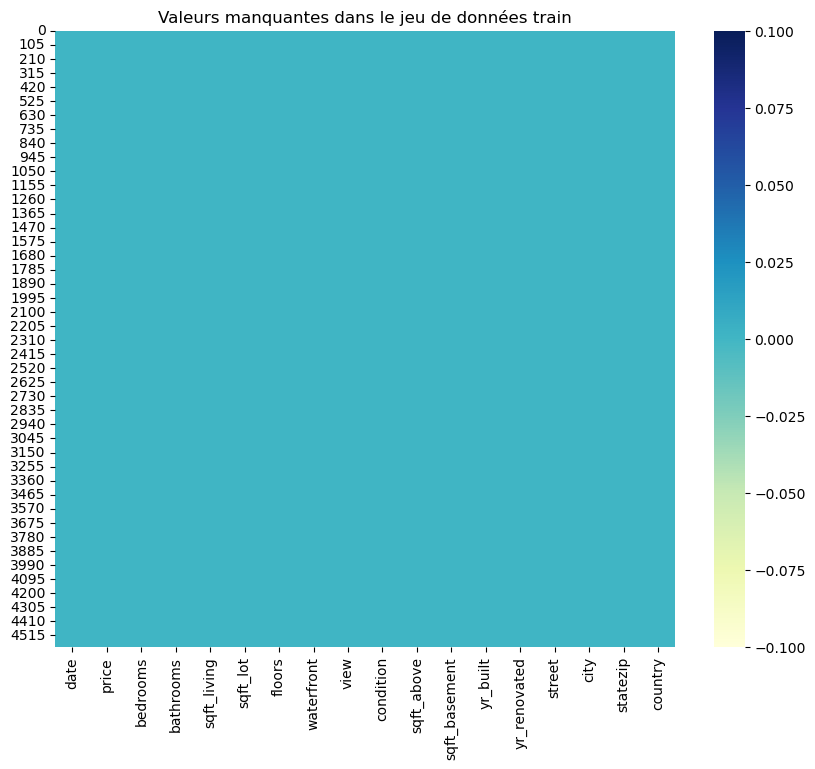

In [5]:
# Création d'un heatmap pour visualiser les valeurs manquantes du train
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cmap="YlGnBu")

# Affichage du titre
plt.title("Valeurs manquantes dans le jeu de données train")

# Affichage du graphique
plt.show()

In [6]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Nous pouvons constater la présence d'aucune valeurs manquante.
A présent, nous allons procéder à l'exploration des variables.

Nous allons démarrer par les variables objets.

###### Graphique de Corrélation

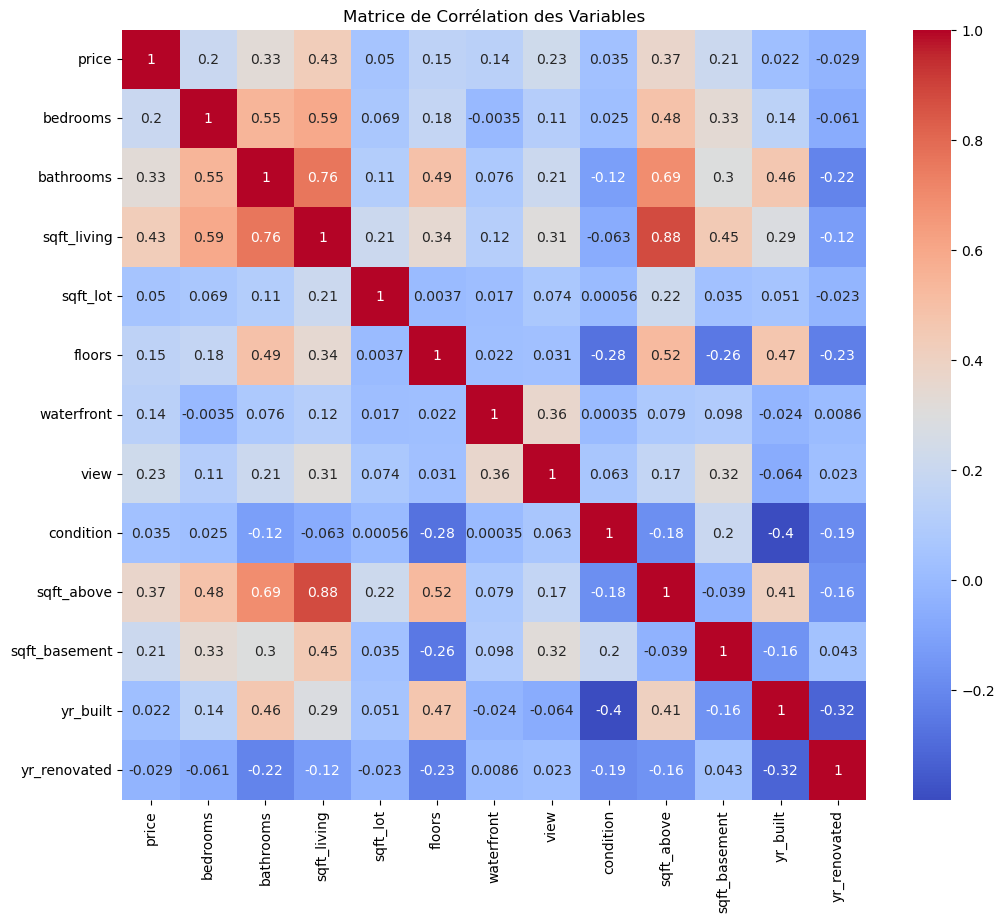

In [7]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Créer une heatmap pour visualiser la corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de Corrélation des Variables")
plt.show()

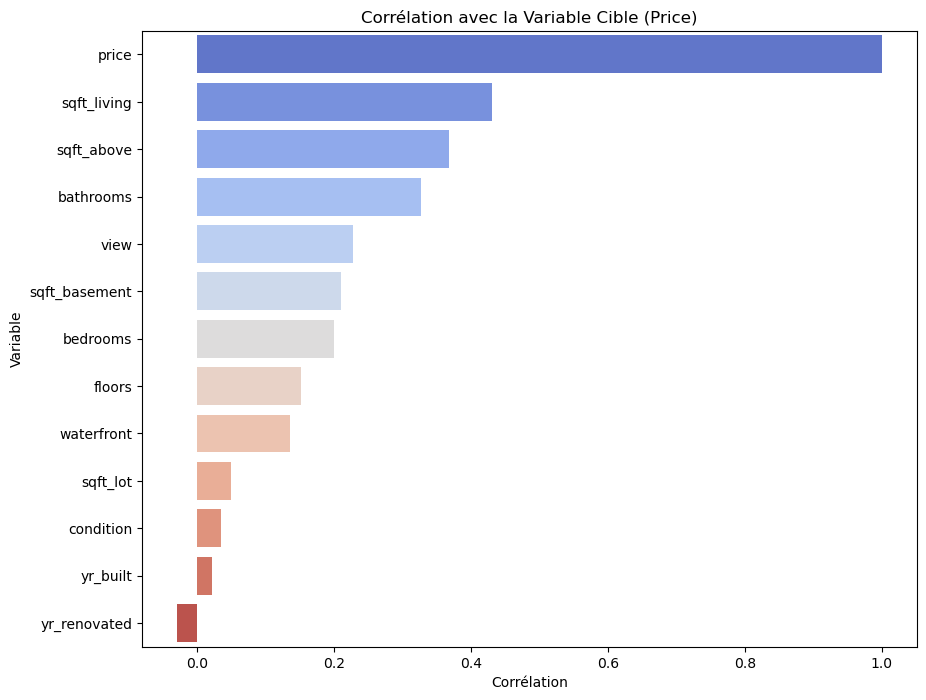

In [8]:
# Calculer la corrélation entre les variables indépendantes et la variable cible
correlation_with_target = df.corrwith(df['price'])

# Créer un DataFrame avec la corrélation
correlation_df = pd.DataFrame({'Variable': correlation_with_target.index, 'Correlation': correlation_with_target.values})
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Créer un graphique de barres pour visualiser la corrélation avec la variable cible
plt.figure(figsize=(10, 8))
sns.barplot(data=correlation_df, x='Correlation', y='Variable', palette="coolwarm")
plt.title("Corrélation avec la Variable Cible (Price)")
plt.xlabel("Corrélation")
plt.ylabel("Variable")
plt.show()

### 2. Exploration des variables

#### A. Exploration des variables objets

In [9]:
# Sélectionner uniquement les colonnes de type 'object'
df_objet = df.select_dtypes(include=['object'])

df_objet

,date,street,city,statezip,country
0,2014-05-02 00:00:00,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...
4595,2014-07-09 00:00:00,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,5148 S Creston St,Seattle,WA 98178,USA


In [10]:
# Boucle pour chaque colonne de type 'object'
for column in df_objet.columns:
    unique_values = df_objet[column].unique()
    n_unique_values = df_objet[column].nunique()
    
    # Afficher les résultats pour chaque variable
    print(f"Variable: {column}")
    print(f"Valeurs uniques: {unique_values}")
    print(f"Nombre de valeurs uniques: {n_unique_values}")
    print("=" * 50)  # Ligne de séparation visuelle

Variable: date
Valeurs uniques: ['2014-05-02 00:00:00' '2014-05-03 00:00:00' '2014-05-04 00:00:00'
 '2014-05-05 00:00:00' '2014-05-06 00:00:00' '2014-05-07 00:00:00'
 '2014-05-08 00:00:00' '2014-05-09 00:00:00' '2014-05-10 00:00:00'
 '2014-05-11 00:00:00' '2014-05-12 00:00:00' '2014-05-13 00:00:00'
 '2014-05-14 00:00:00' '2014-05-15 00:00:00' '2014-05-16 00:00:00'
 '2014-05-17 00:00:00' '2014-05-18 00:00:00' '2014-05-19 00:00:00'
 '2014-05-20 00:00:00' '2014-05-21 00:00:00' '2014-05-22 00:00:00'
 '2014-05-23 00:00:00' '2014-05-24 00:00:00' '2014-05-25 00:00:00'
 '2014-05-26 00:00:00' '2014-05-27 00:00:00' '2014-05-28 00:00:00'
 '2014-05-29 00:00:00' '2014-05-30 00:00:00' '2014-05-31 00:00:00'
 '2014-06-01 00:00:00' '2014-06-02 00:00:00' '2014-06-03 00:00:00'
 '2014-06-04 00:00:00' '2014-06-05 00:00:00' '2014-06-06 00:00:00'
 '2014-06-07 00:00:00' '2014-06-08 00:00:00' '2014-06-09 00:00:00'
 '2014-06-10 00:00:00' '2014-06-11 00:00:00' '2014-06-12 00:00:00'
 '2014-06-13 00:00:00' '2014-0

L'ensemble des données proviennent de l'état de Washington aux USA. L'ensemble des dates provient d'une récolte des données de mai à juillet.
Nous allons prendre la décision de ne conserver que le nom des villes dans notre jeu de données. Cela va tout simplement correspondre à une précision sur la ville.

In [11]:
# Supression des colonnes non souhaitées dans le df

df.drop(columns = ['statezip', 'street', 'date', 'country'], inplace = True)

df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle


#### B. Exploration des variables numériques

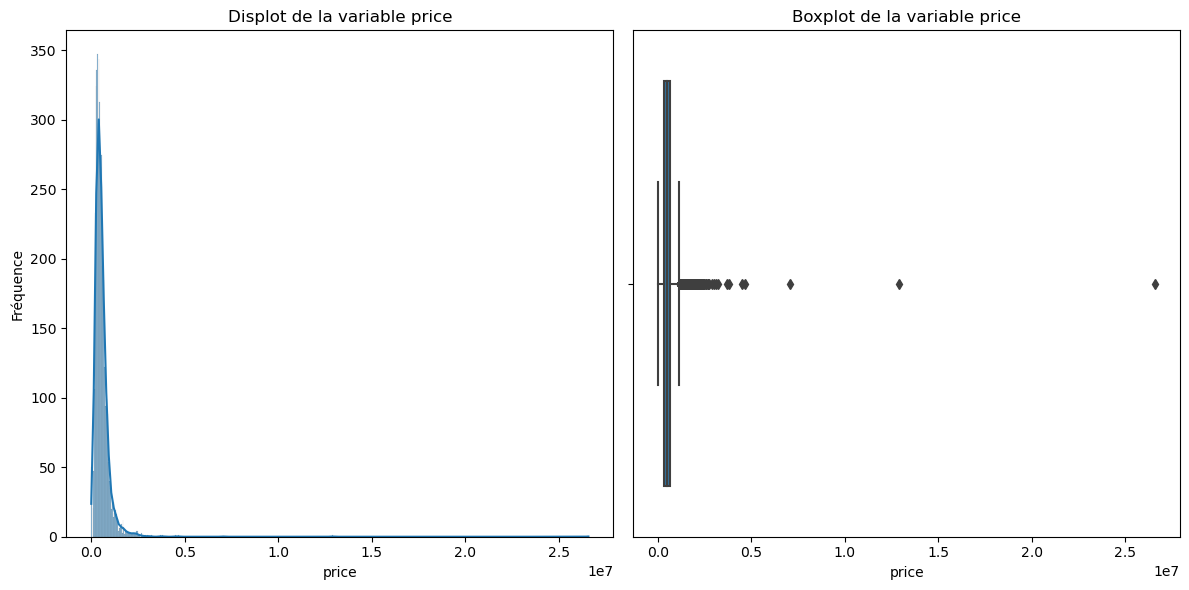

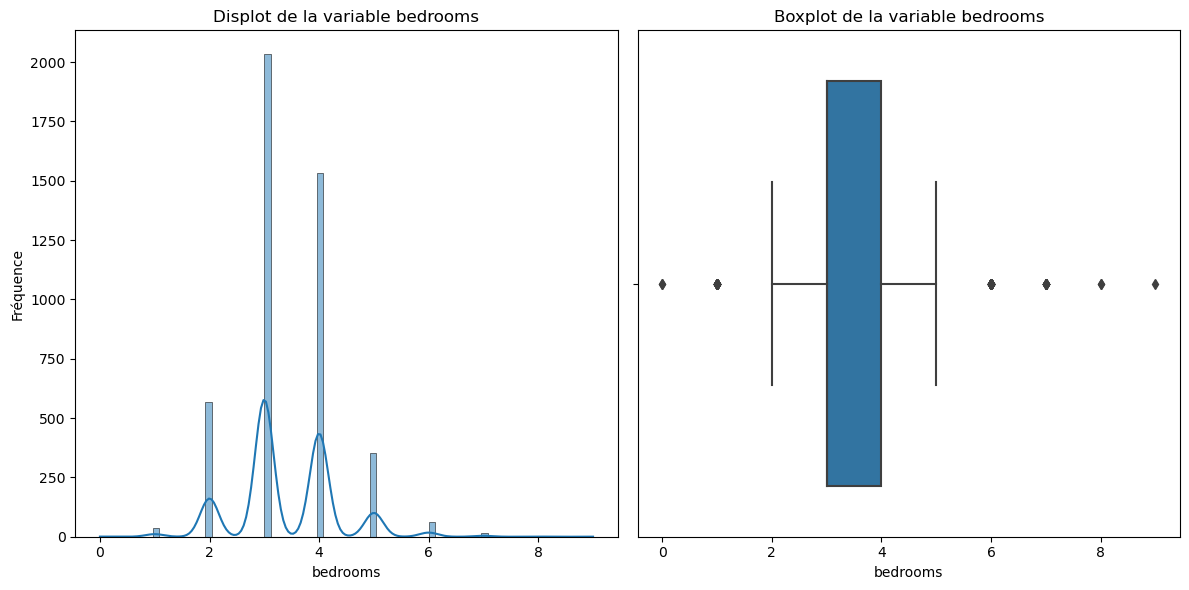

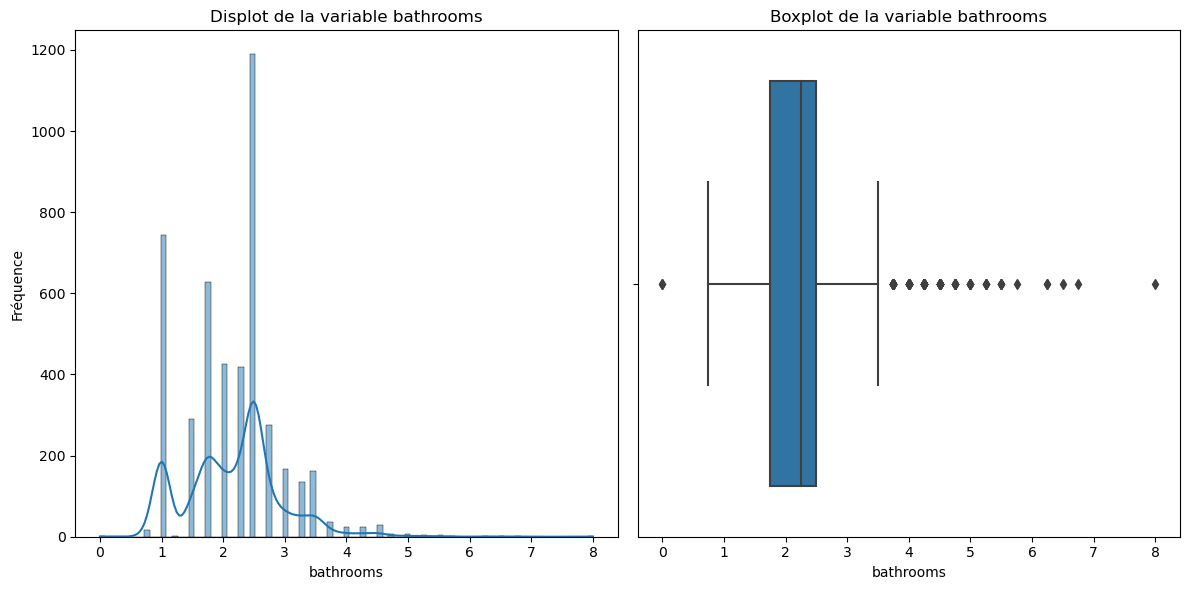

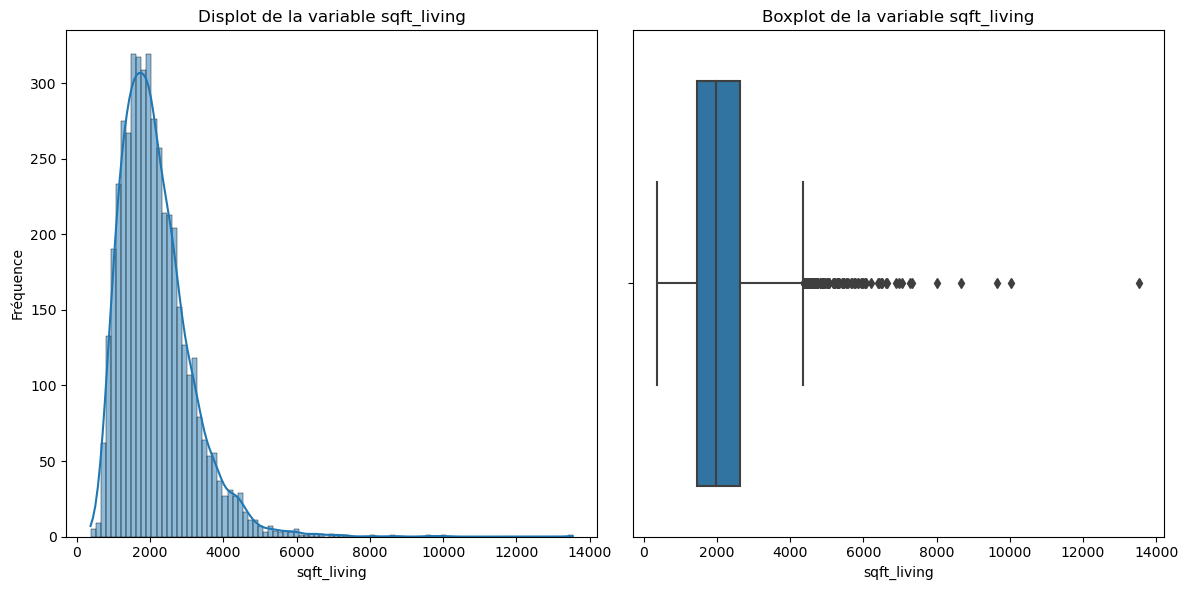

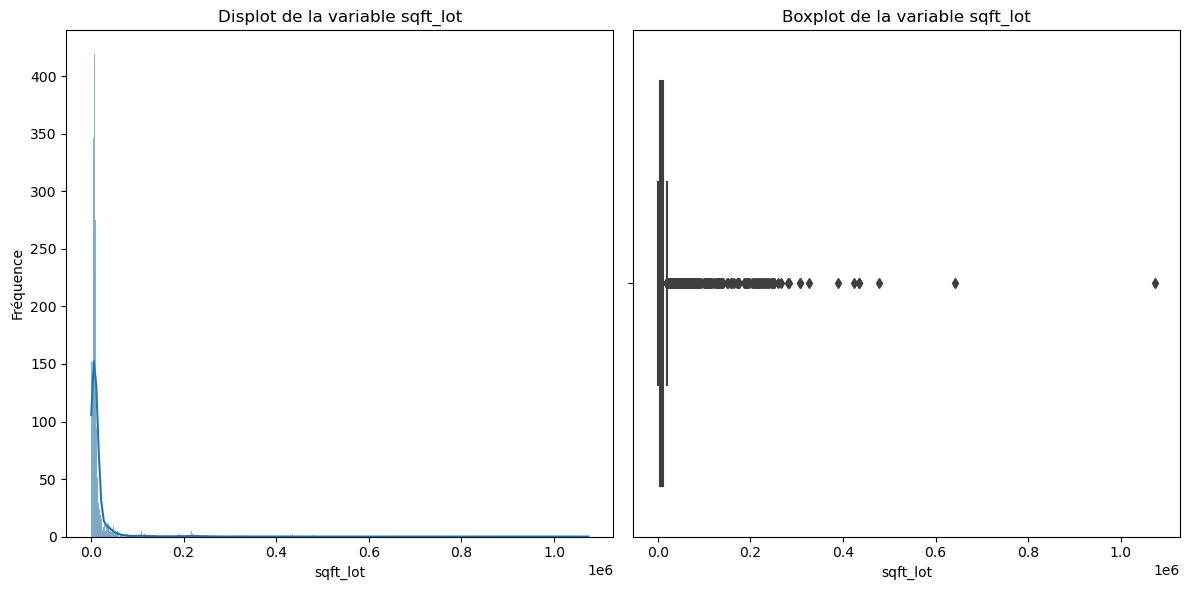

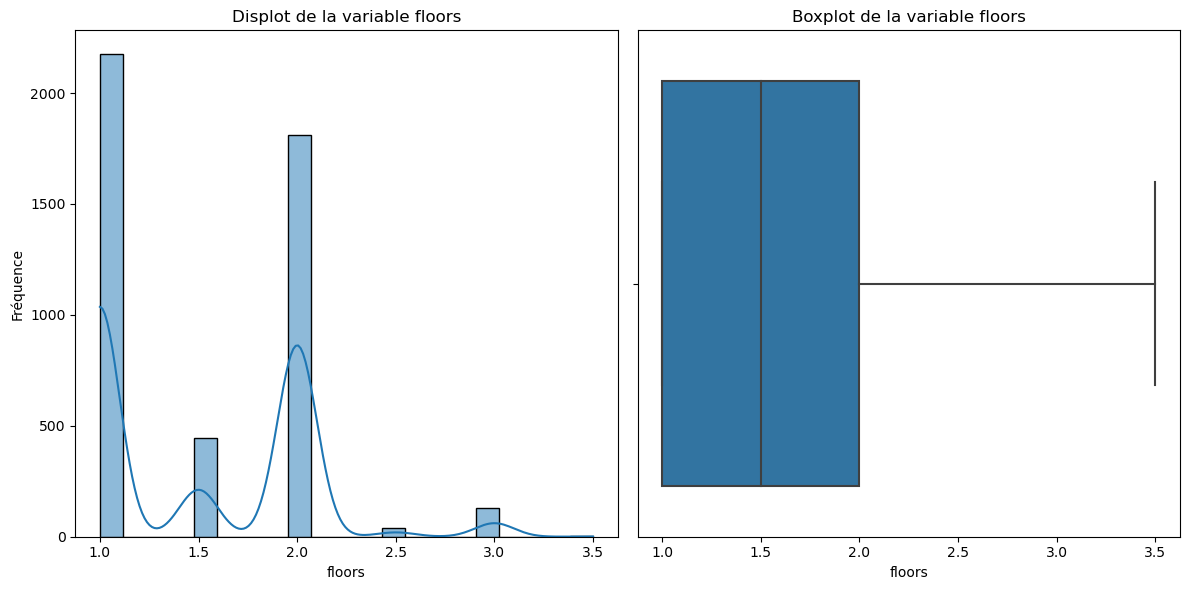

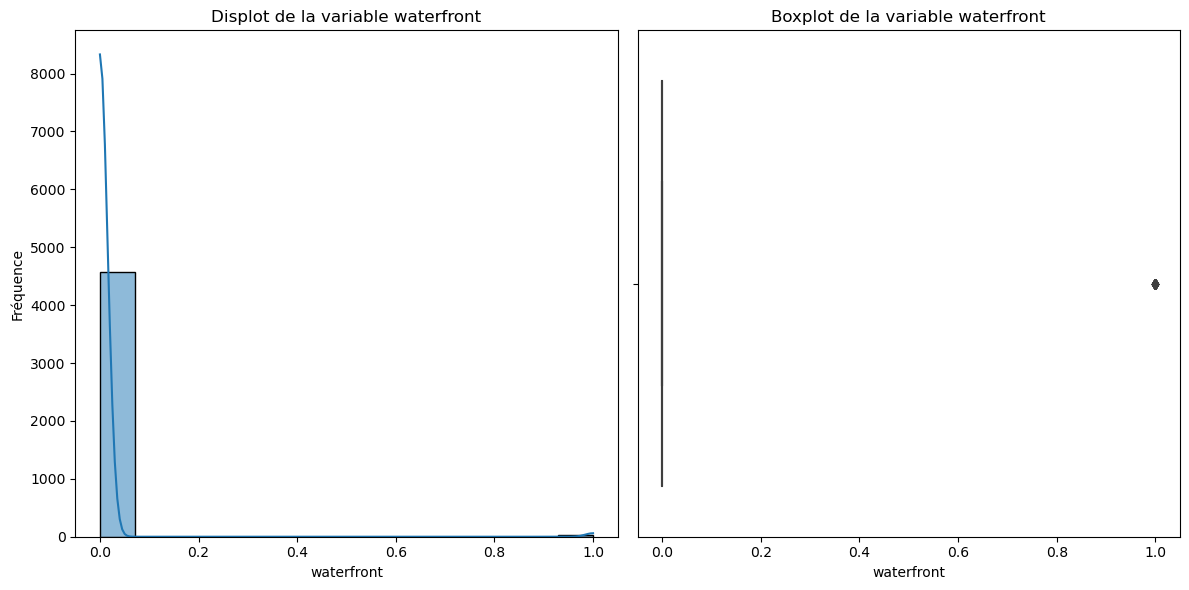

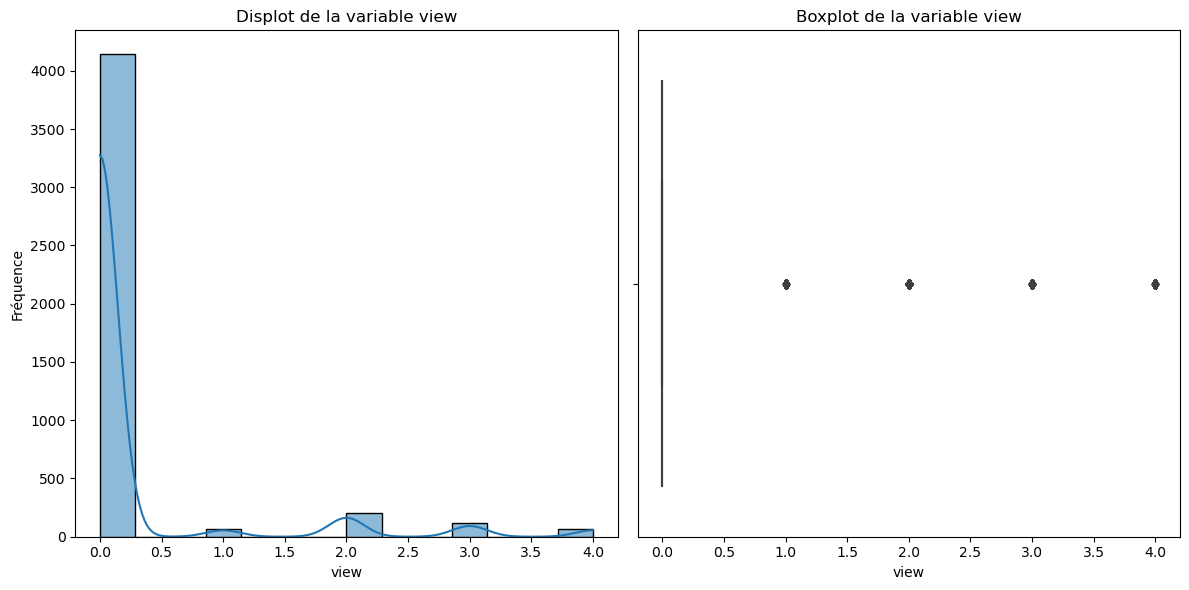

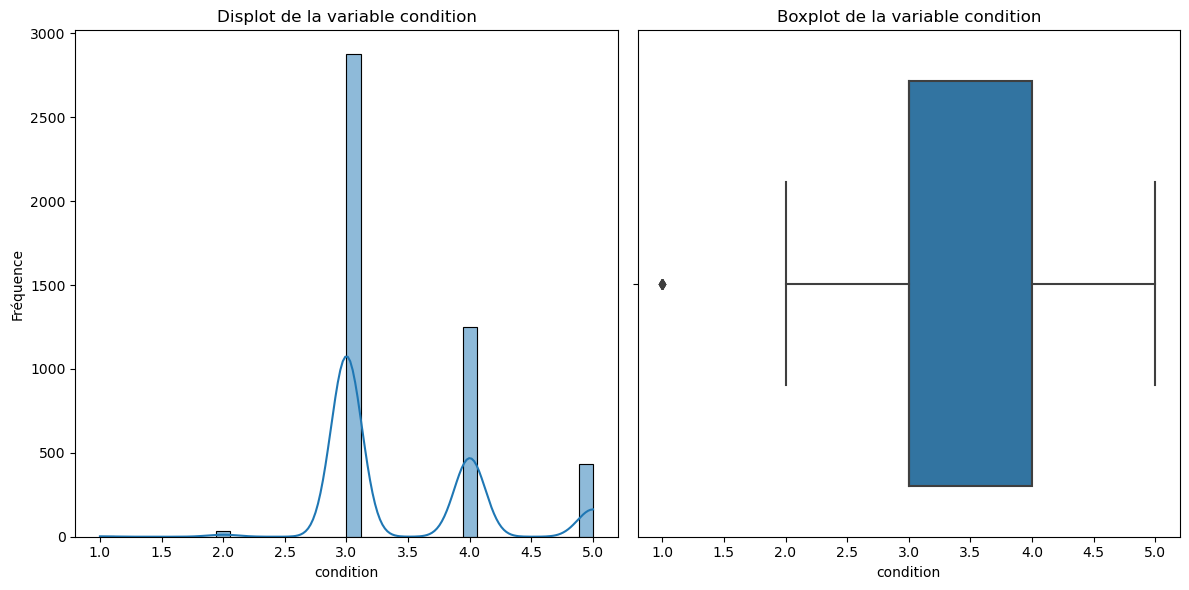

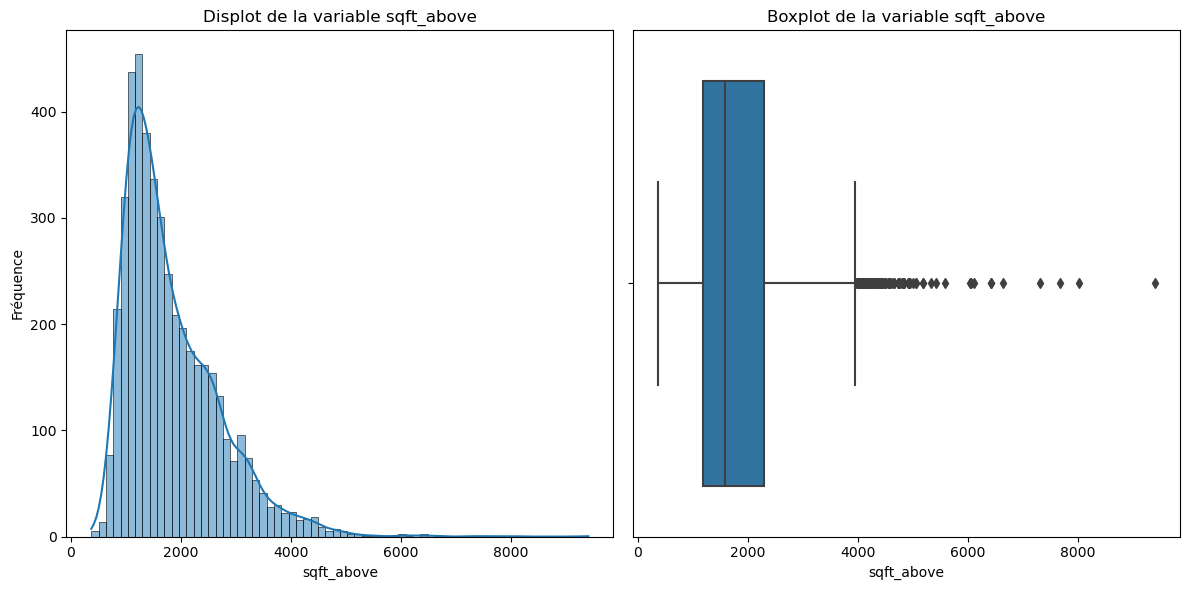

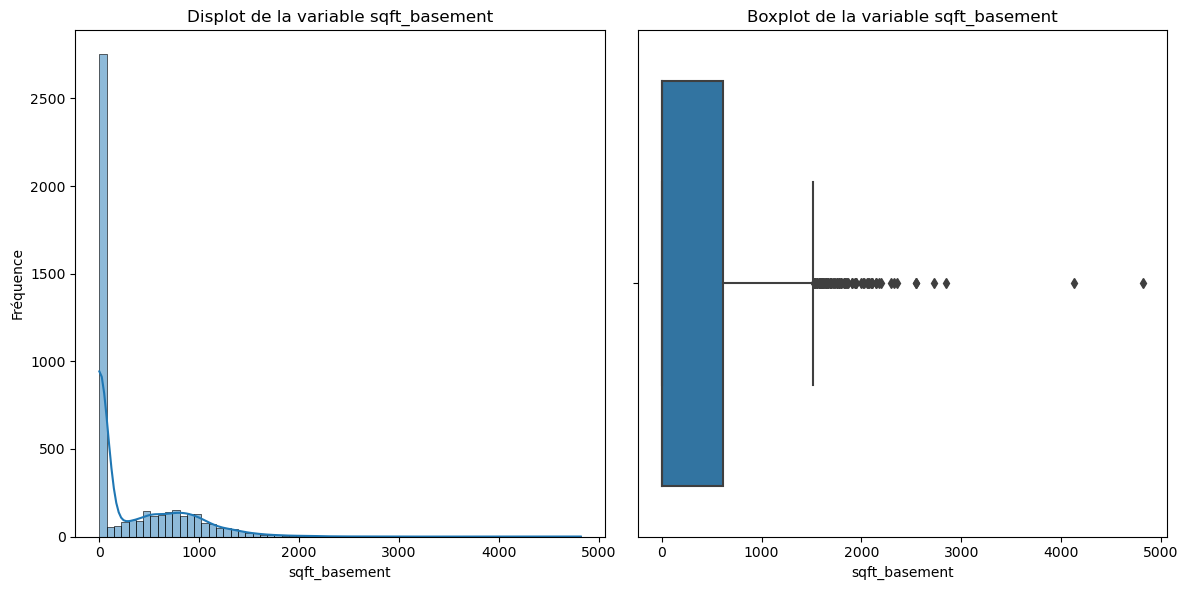

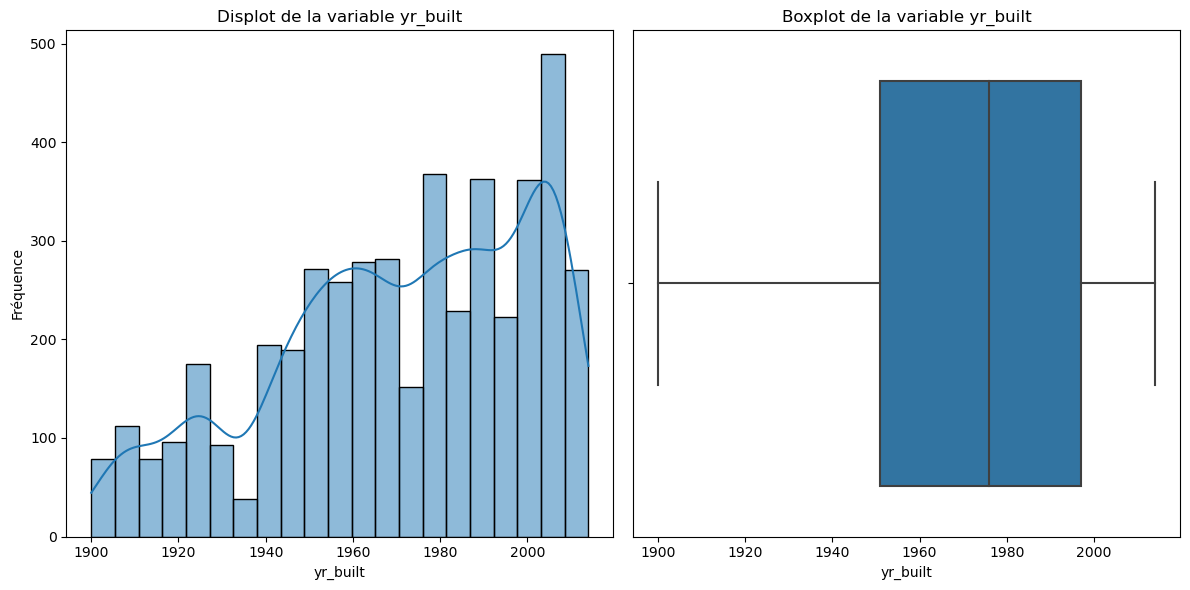

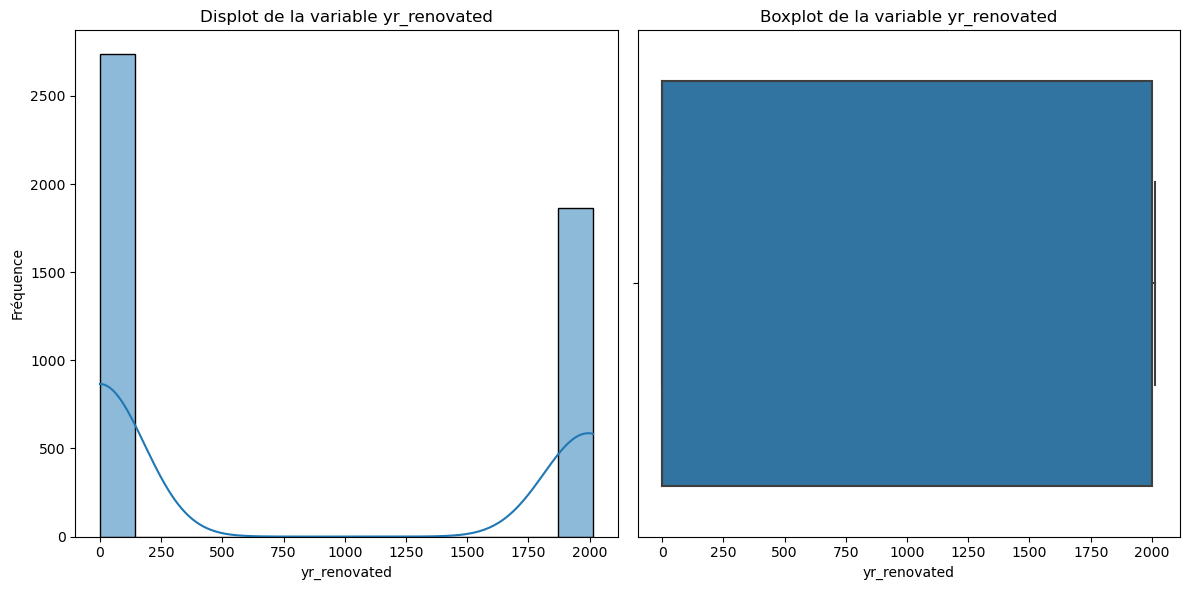

In [12]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Boucle pour chaque colonne numérique
for column in numeric_columns.columns:
    # Créer une figure avec deux sous-graphiques (displot et boxplot)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Displot (distribution plot)
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_title(f"Displot de la variable {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Fréquence")

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f"Boxplot de la variable {column}")
    axes[1].set_xlabel(column)

    # Ajuster l'espacement entre les sous-graphiques
    plt.tight_layout()

    # Afficher les graphiques
    plt.show()


###### Constat de nos analyses

Après analyse de nos différentes variables, il est important de signaler les points suivants :

- présence de valeurs aberrantes dans la variable 'price' : il sera important de traiter ces variables.
- la variable 'yr_renovated' n'est pas pertinente en l'état : il faut modifier la nature de cette variable,
- l'année de construction serait plus important avec l'âge du batiment.

### 3. Feature Engineering

Dans notre jeu de données, nous avons pu constater que l'ensemble de nos variables ne présentent aucune valeur manquante.

Nous allons procéder aux étapes suivantes : 
- création d'une nouvelle variable pour indiquer si le bien est rénové ou non,
- création variable pour indiquer l'âge du batiment et non son année de construction,
- encodage de la variable city.
- suppression des variables avec un prix supérieur à 1 000 000 et égal à 100000, ce qui correspond à des valeurs aberrantes ou atypiques.

###### Création variable

In [13]:

# Création variable bien rénové
df['bien_renove'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Suppression colonne non conservée
df.drop(columns = ['yr_renovated'], inplace = True)

In [14]:
# Obtenir l'année actuelle
current_year = datetime.now().year

# Créer la variable d'âge du bâtiment
df['building_age'] = current_year - df['yr_built']

# Supprimer la colonne d'origine 'yr_built'
df.drop('yr_built', axis=1, inplace=True)

##### Encodage variable

In [15]:
# Utilisation de l'encodage par étiquetage (Label Encoding)
df['city_encoded'] = df['city'].astype('category').cat.codes

# Supprimer la colonne d'origine 'city'
df.drop('city', axis=1, inplace=True)

###### Suppression prix supérieur à 1000000 et inférieur à 100000

In [16]:
# Supprimer les lignes avec des valeurs aberrantes
df = df[(df['price'] < 1000000) & (df['price'] > 100000)]

In [17]:
# Vérification résultat Feature Engineering.
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,bien_renove,building_age,city_encoded
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1,68,36
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,0,57,18
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,0,60,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1,47,31
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1,85,35


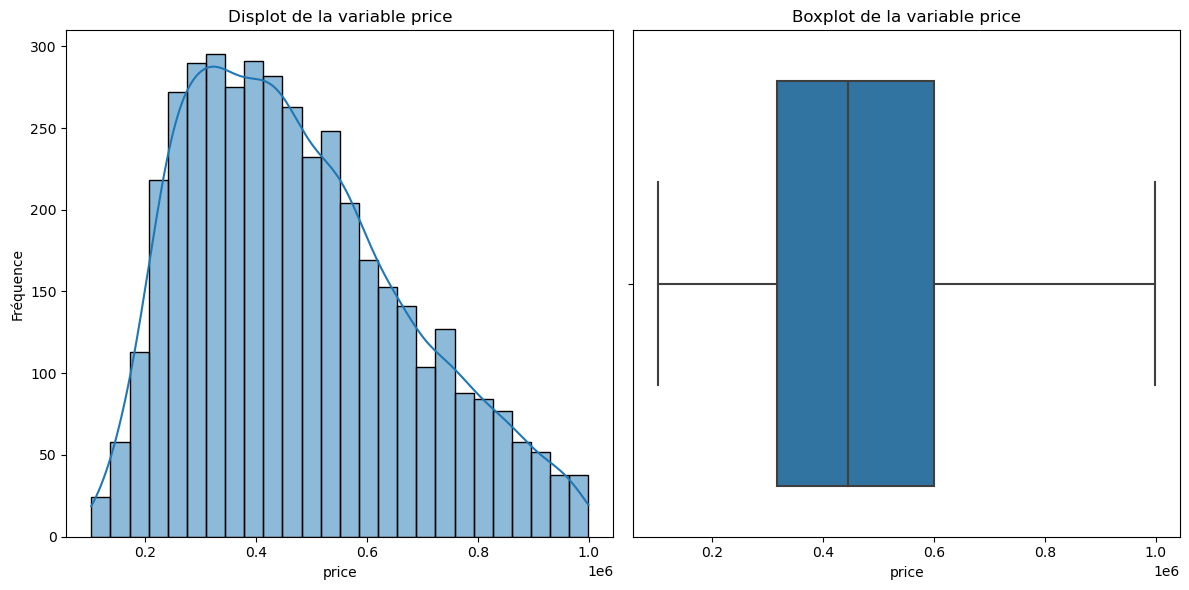

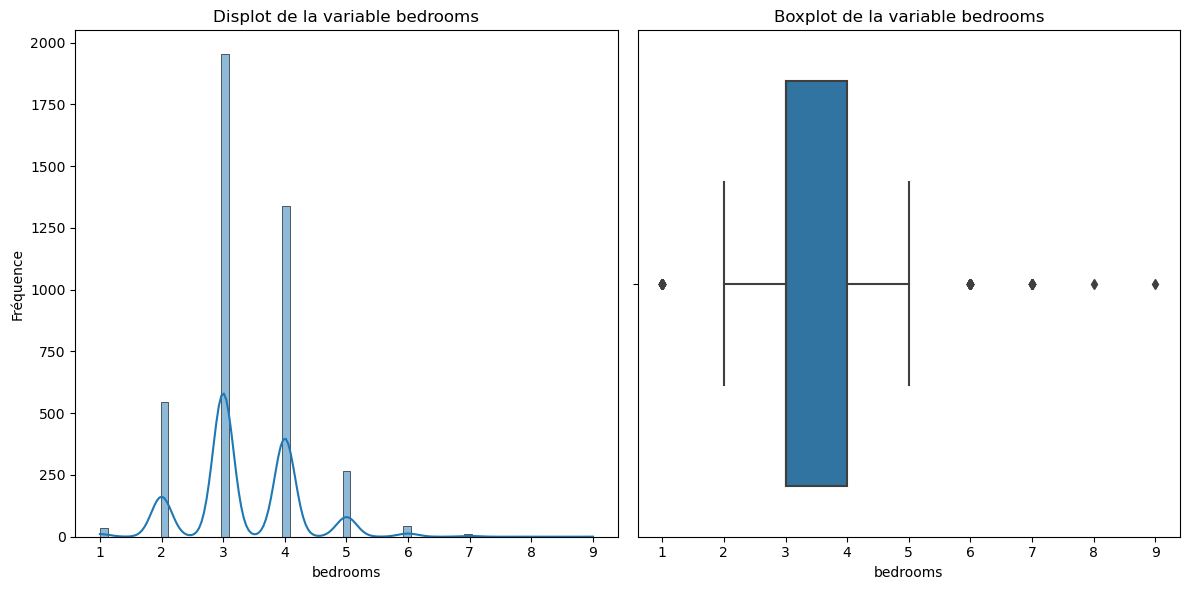

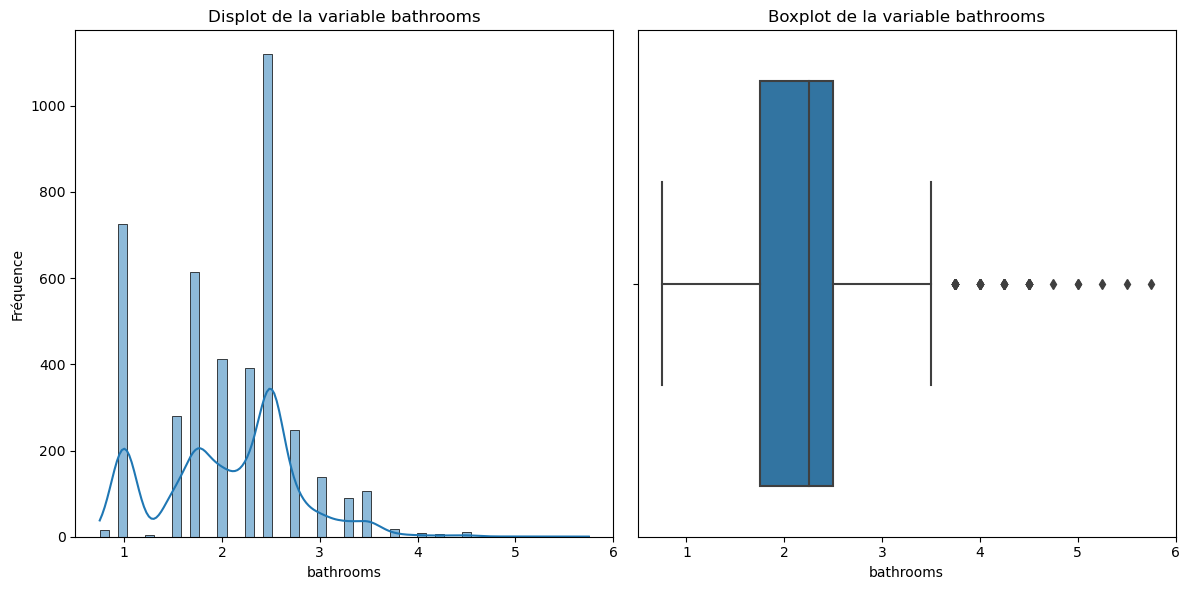

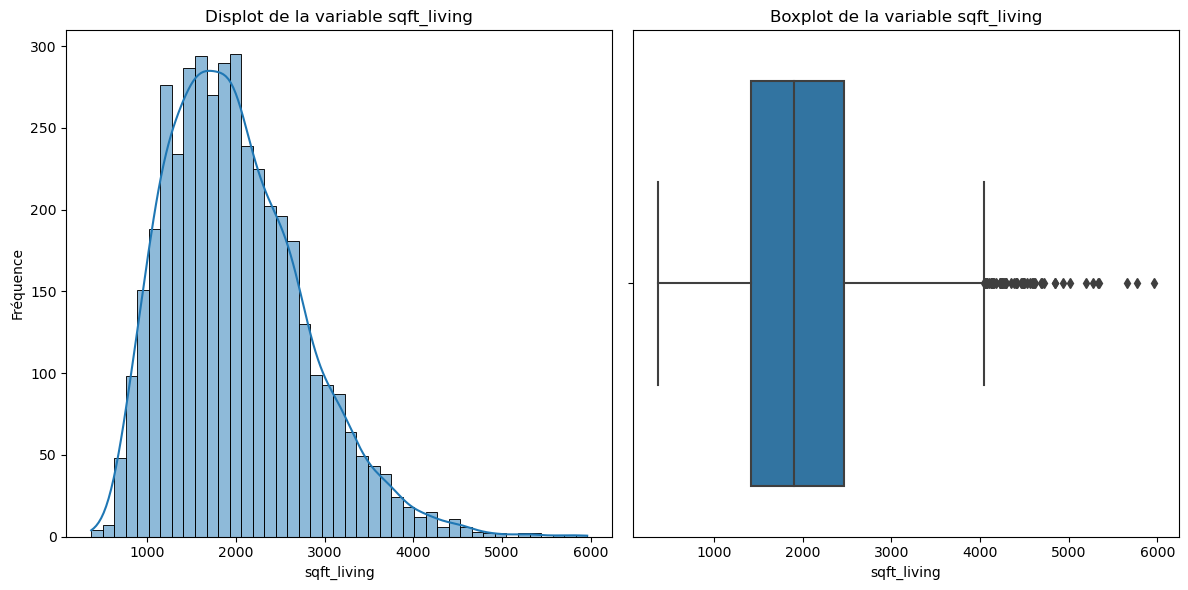

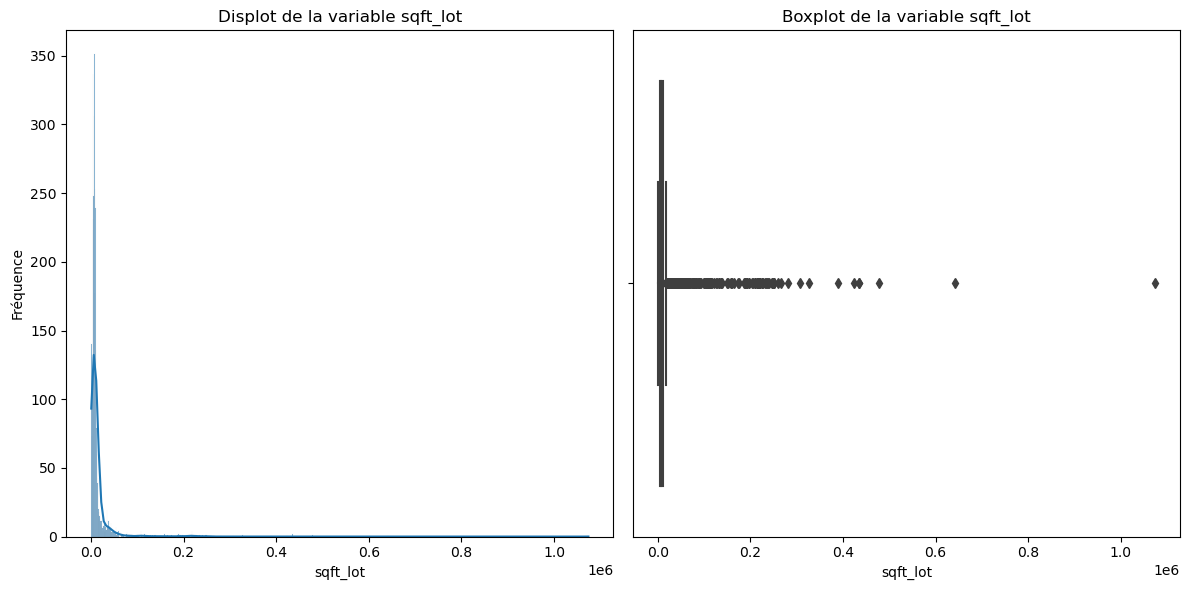

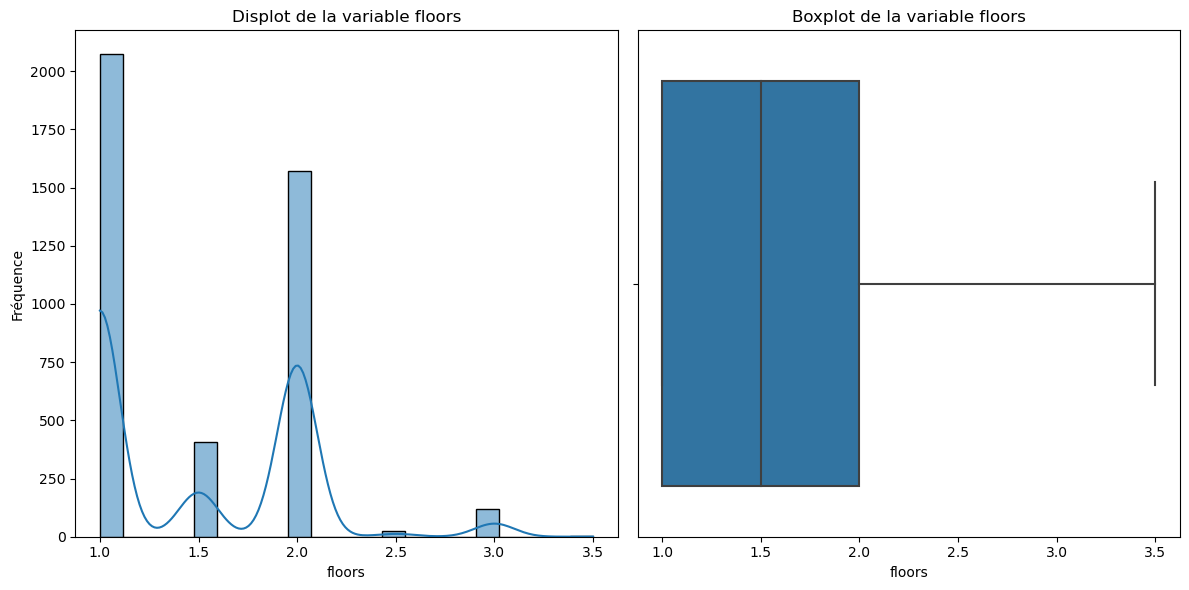

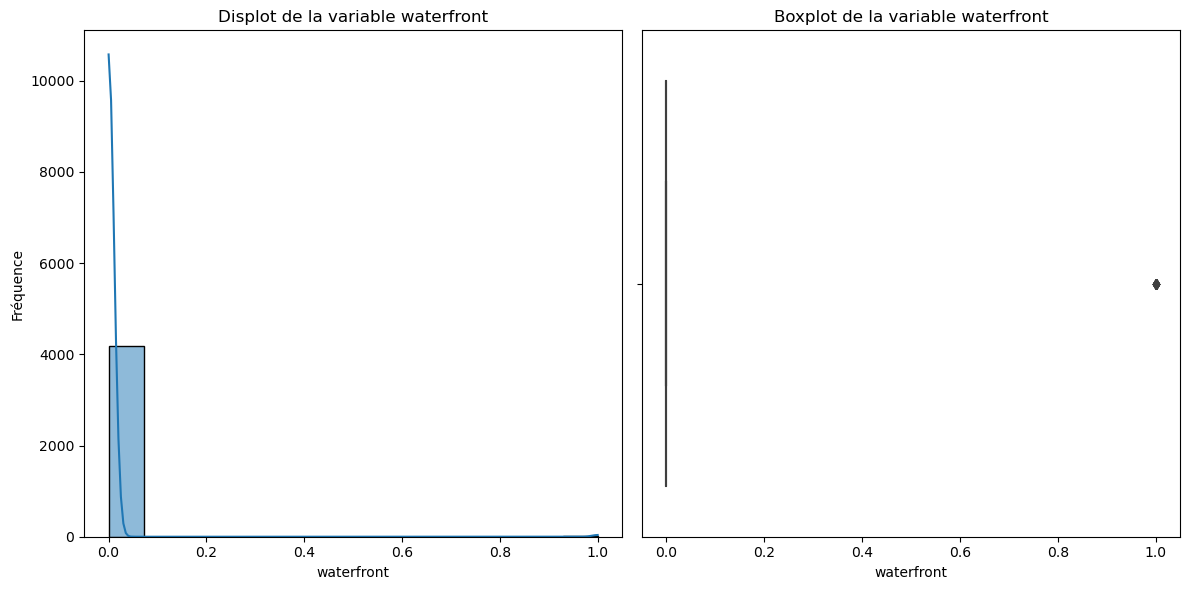

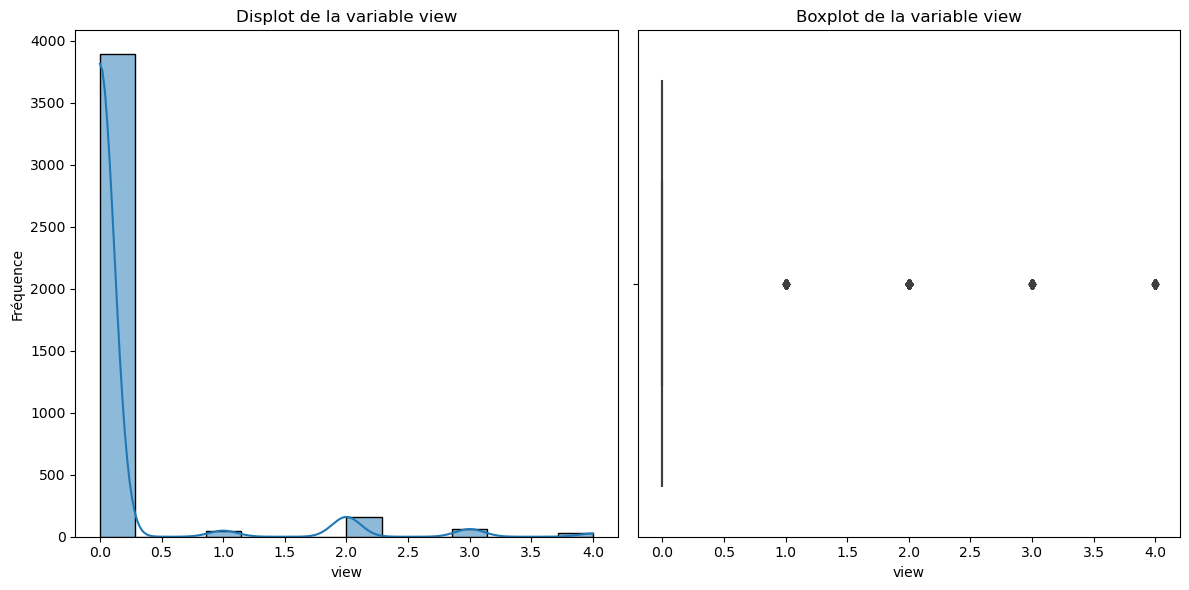

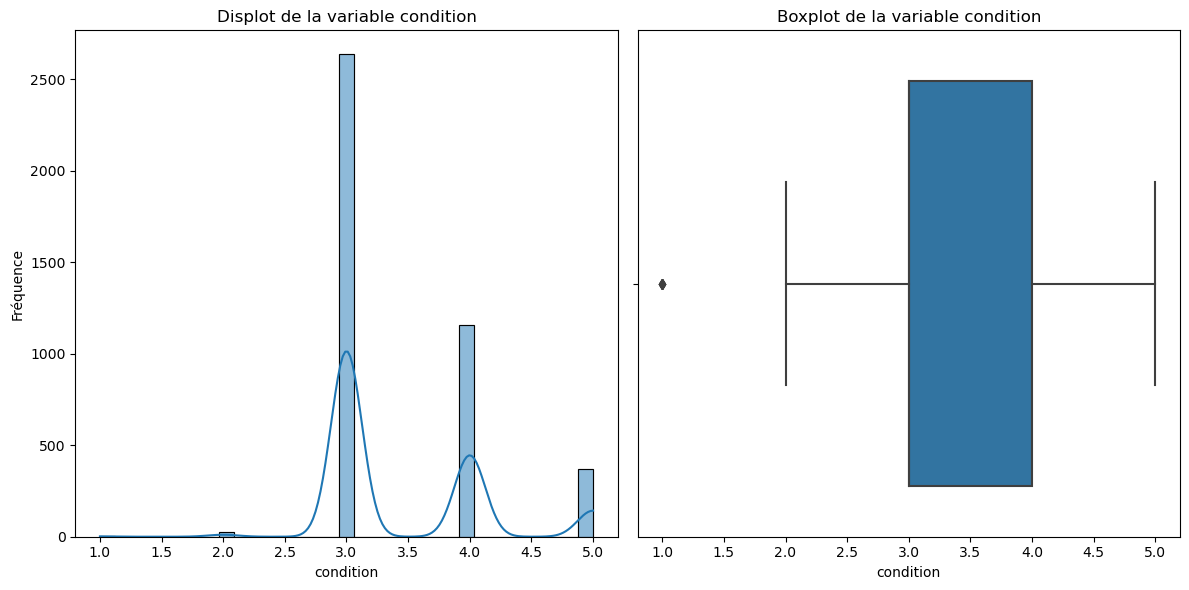

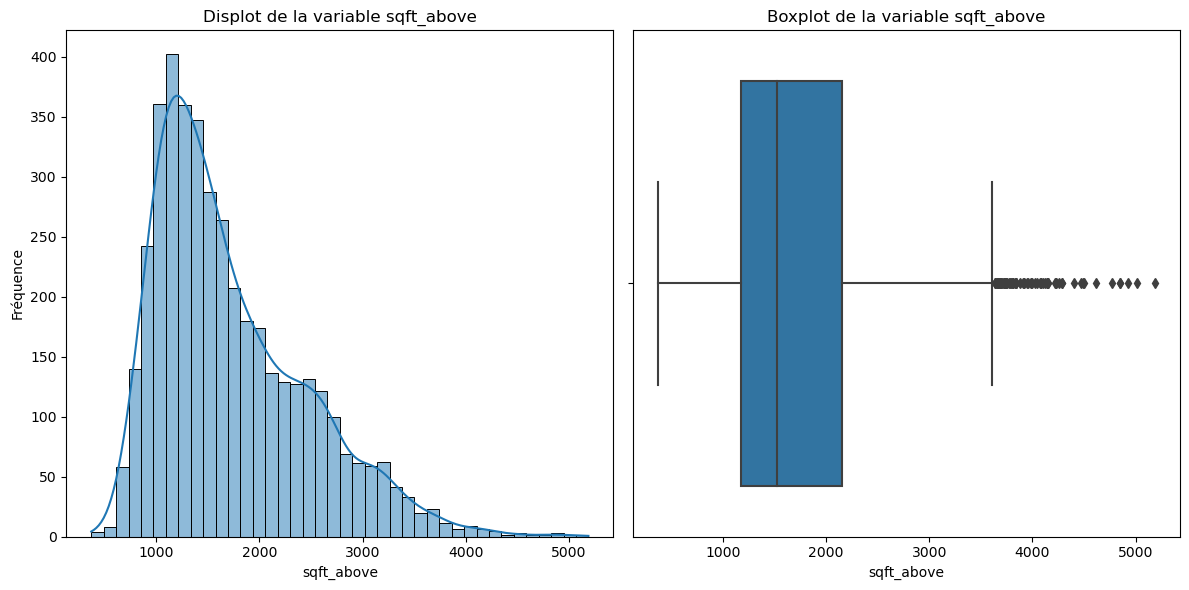

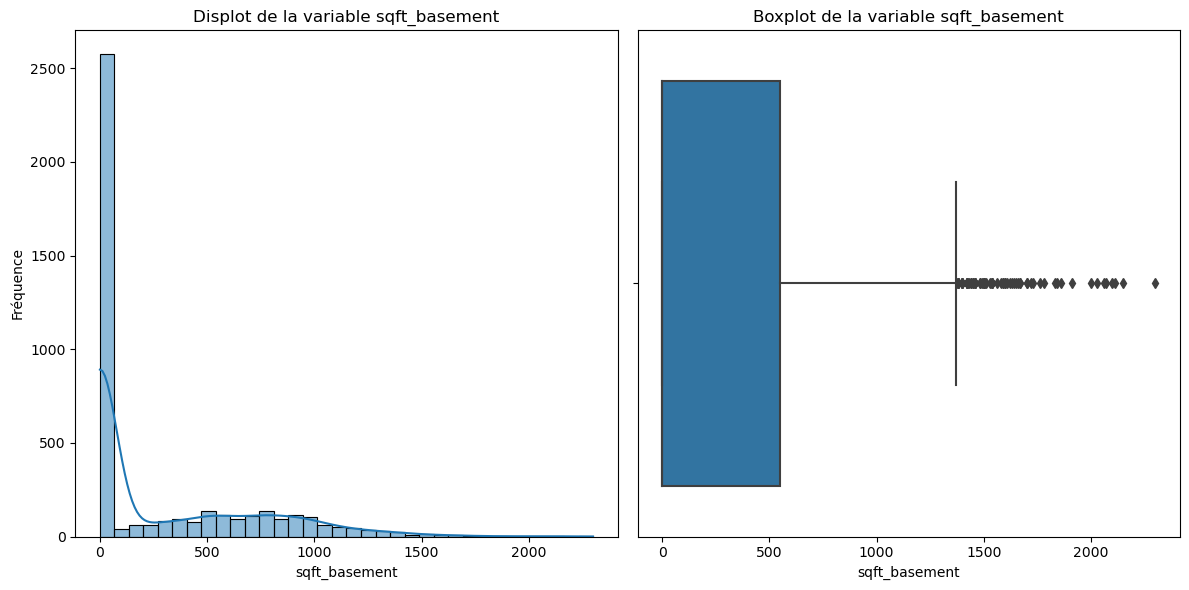

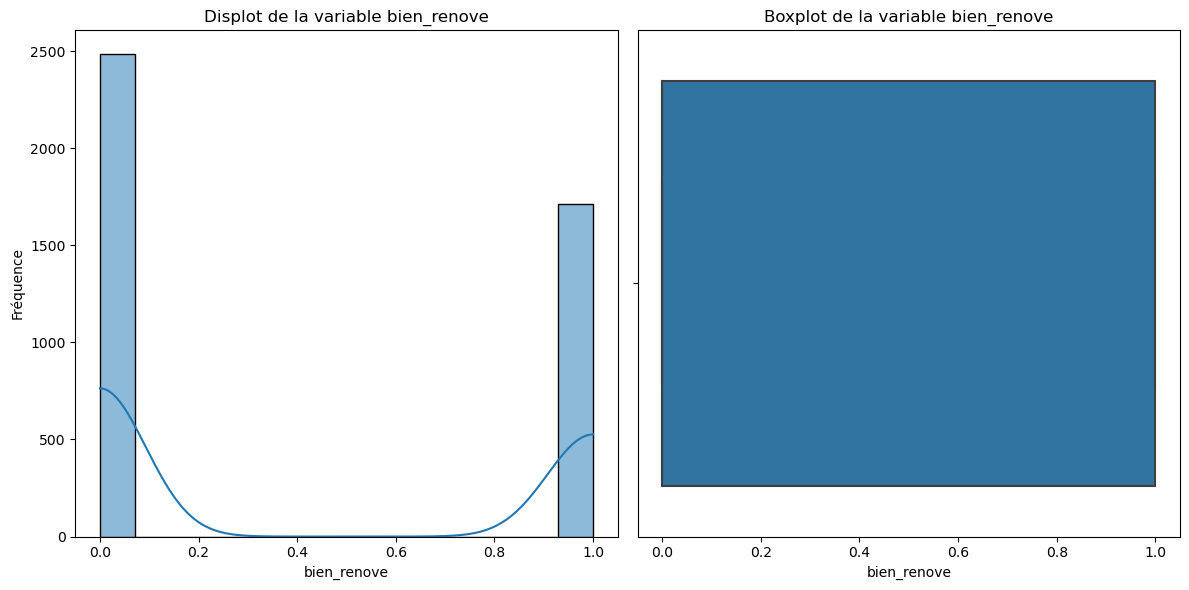

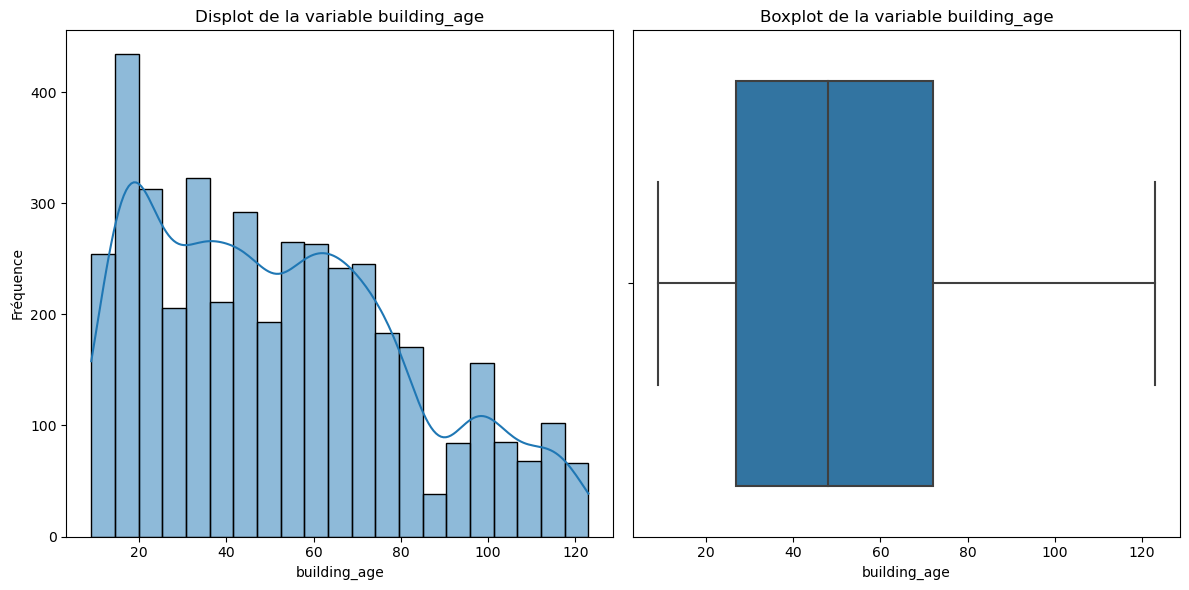

In [18]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Boucle pour chaque colonne numérique
for column in numeric_columns.columns:
    # Créer une figure avec deux sous-graphiques (displot et boxplot)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Displot (distribution plot)
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_title(f"Displot de la variable {column}")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Fréquence")

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f"Boxplot de la variable {column}")
    axes[1].set_xlabel(column)

    # Ajuster l'espacement entre les sous-graphiques
    plt.tight_layout()

    # Afficher les graphiques
    plt.show()

Nous avons finalisé notre étape du feature engineering.
L'objectif étant de simplifier certaines variables mais également de préparer les variables pour notre étape de modélisation.

Nous avons ainsi une meilleure lecture des variables notamment sur l'âge et la rénovation d'un bien immobilier.
Enfin, notre suppression des valeurs atypiques nous a supprimé 406 lignes mais l'écart avec l'ensemble des données peut provoquer une diminution de la qualité de notre modélisation.
En effet, à la vue du prix de l'immobilier moyen que nous pouvons constater, tous les tarifs inférieurs à 100000 et supérieur à 1000000 semble présenter une anomalie.

Toutefois, ces résultats peuvent être obtenus via un listing pour y déterminer les principales causes pour ces tarifs.

## III. Modélisation
### 1. Préparation des données

In [19]:
# Création du X et du y

X = df.drop('price', axis=1)  # Features
y = df['price']  # Target

# Utilisation de train_test_split pour diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement X :", X_train.shape)
print("Dimensions de l'ensemble de test X :", X_test.shape)
print("Dimensions de l'ensemble d'entraînement y :", y_train.shape)
print("Dimensions de l'ensemble de test y :", y_test.shape)

Dimensions de l'ensemble d'entraînement X : (3355, 13)
Dimensions de l'ensemble de test X : (839, 13)
Dimensions de l'ensemble d'entraînement y : (3355,)
Dimensions de l'ensemble de test y : (839,)


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler = StandardScaler()

# Adapter le scaler aux données d'entraînement et le transformer
X_train = scaler.fit_transform(X_train)

# Transformer les données de test en utilisant le scaler appris sur les données d'entraînement
X_test = scaler.transform(X_test)

### 2. Modélisation

Nous sommes sur une problématique liée à une régression, nous allons donc sélectionner les modèles les plus utilisés pour ce sujet.
En fonction des résultats, nous allons sélectionner 1 ou 2 modèles afin d'améliorer ces résultats.

In [21]:
# Import des modèles de régression
models = [("Linear Regression", LinearRegression()), 
          ("SVR", SVR()),
          ('Random Forest', RandomForestRegressor()),
          ('Gradient Boosting', GradientBoostingRegressor()),
          ('LightGBM', LGBMRegressor()),
          ("Ridge Regression", Ridge()), 
          ("Lasso Regression", Lasso()),
          ("Elastic Net Regression", ElasticNet())]

results = []
names = []
training_times = []
finalResults = []

for name, model in models:
    start_time = time.time()  # Temps de début d'entraînement du modèle
    model.fit(X_train, y_train)
    end_time = time.time()  # Temps de fin d'entraînement du modèle
    training_time = end_time - start_time  # Calcul du temps d'entraînement
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_predictions)
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    
    test_mse = mean_squared_error(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    results.append(test_r2)  # Utiliser le score R2 du test pour la comparaison
    names.append(name)
    training_times.append(training_time)
    
    finalResults.append((name, train_mse, train_mae, train_r2,
                         test_mse, test_mae, test_r2, training_time))

finalResults.sort(key=lambda k: k[6], reverse=True)  # Utiliser le score R2 du test pour le tri

# Créer un DataFrame avec les résultats
df_results = pd.DataFrame(finalResults, columns=['Modèle', 
                                                 'Train MSE', 'Train MAE', 'Train R2', 
                                                 'Test MSE', 'Test MAE', 'Test R2', 
                                                 'Temps d\'entraînement'])

# Consultation des résultats
df_results

,Modèle,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2,Temps d'entraînement
0,LightGBM,5.526034e+09,54875.863634,0.855216,1.241062e+10,80648.665183,0.692297,0.711617
1,Random Forest,1.880307e+09,31565.572046,0.950735,1.369151e+10,86207.630972,0.660540,6.995505
2,Gradient Boosting,1.067691e+10,78880.915172,0.720261,1.371985e+10,87640.968497,0.659837,1.252583
3,Linear Regression,2.071188e+10,114523.488358,0.457341,2.061263e+10,115401.127334,0.488941,0.008471
4,Lasso Regression,2.071188e+10,114523.655347,0.457341,2.061265e+10,115401.369936,0.488940,0.120857
5,Ridge Regression,2.071188e+10,114526.543575,0.457341,2.061349e+10,115405.953825,0.488919,0.002684
6,Elastic Net Regression,2.194743e+10,120186.063935,0.424970,2.270971e+10,122941.346685,0.436947,0.007005
7,SVR,3.923625e+10,158605.358342,-0.028004,4.170724e+10,163806.801678,-0.034069,1.778742


Dans nos différents résultats, nous constatons que le LightGBM présente les meilleurs résultats avec un temps d'entrainement très faible.
Nous ressortons avec un résultat d'environ 0,69, ce qui représente un bon score pour cette étape.

De plus, il semble que nous ne soyons pas en présence d'un risque d'overfitting.

Nous allons prendre la décision de conserver uniquement le LightGBM pour notre étape d'optimisation des paramètres.

### 2. Optimisation

#### 2.1 Cross Validation

In [22]:
cross_val_score(LGBMRegressor(), X_train, y_train, cv = 10).mean()

0.6792263286006781

###### Max Depth

In [23]:
%%time
# Créer le classifieur LightGBM
lgb_model = LGBMRegressor()

max_depth = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
score_apprentissage, score_validation = validation_curve(lgb_model, X_train, y_train,
                                                          param_name='max_depth',
                                                          param_range=max_depth, cv=10)

CPU times: total: 2min 2s
Wall time: 20.5 s


In [24]:
score_validation.mean(axis = 1)

array([0.60266181, 0.66937269, 0.67699098, 0.67706755, 0.67723794,
       0.6773751 , 0.67928508, 0.67764342, 0.67924475, 0.67823619])

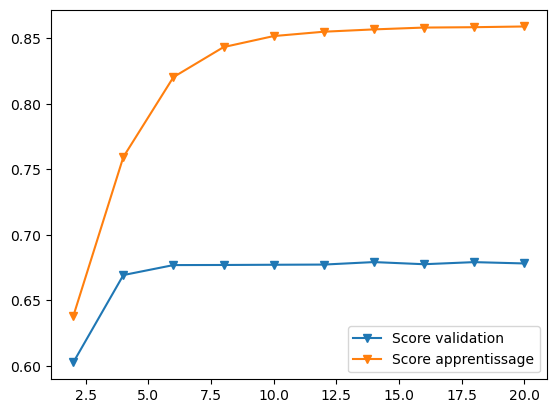

In [25]:
plt.plot(max_depth, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(max_depth, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

Pour ce premier paramètre, il semble que le meilleur paramètre se situe entre 12 et 18. Nous allons garder cette plage pour l'étape du GridSearchCV.

###### Learning Rate

In [26]:
%%time

learning_rate = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
score_apprentissage, score_validation = validation_curve(lgb_model, X_train, y_train,
                                                          param_name='learning_rate',
                                                          param_range=learning_rate, cv=10)

CPU times: total: 1min 29s
Wall time: 19.3 s


In [27]:
score_validation.mean(axis = 1)

array([0.49503058, 0.67869047, 0.67922633, 0.65106773, 0.58534965,
       0.53390176, 0.44676976])

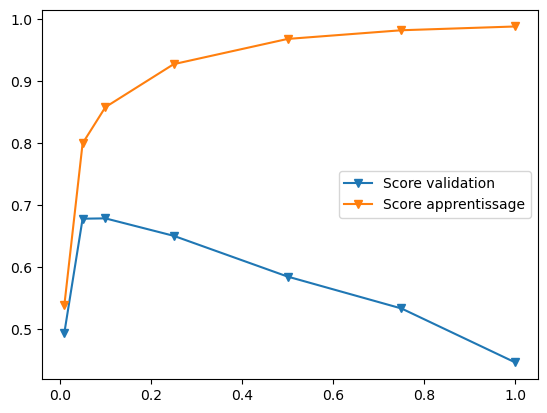

In [28]:
plt.plot(learning_rate, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(learning_rate, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

Pour ce paramètre, le meilleur résultat se situe entre 0 et 0.2. Notre score de validation chute fortement au delà de cette plage de paramètres.

###### n_estimators

In [29]:
%%time

n_estimators = [10, 50, 100, 150, 200, 500]
score_apprentissage, score_validation = validation_curve(lgb_model, X_train, y_train,
                                                          param_name='n_estimators',
                                                          param_range=n_estimators, cv=10)

CPU times: total: 2min 26s
Wall time: 26.3 s


In [30]:
score_validation.mean(axis = 1)

array([0.50209286, 0.67781212, 0.67922633, 0.67758621, 0.67267016,
       0.65398196])

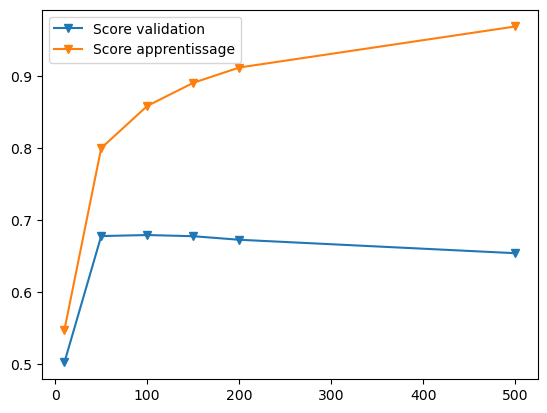

In [31]:
plt.plot(n_estimators, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(n_estimators, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

Pour ce troisième paramètre, notre meilleur plage se situe entre 50 et 100.

#### GridSearch CV

In [32]:
# Création des différentes plages de paramètres

grid_param = {'max_depth': [12, 13, 14, 15, 16, 17, 18],
             'learning_rate': [0.1, 0.11, 0.12, 0.13, 0.14, 0.15],
             'n_estimators' : [50, 60, 70, 80, 90, 100]}
              
    
grid_search_light = GridSearchCV(LGBMRegressor(), grid_param, cv = 5)

In [33]:
%%time

# ici, on entraine la fonction
grid_search_light.fit(X_train, y_train)

CPU times: total: 22min 7s
Wall time: 3min 45s


GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.11, 0.12, 0.13, 0.14, 0.15],
                         'max_depth': [12, 13, 14, 15, 16, 17, 18],
                         'n_estimators': [50, 60, 70, 80, 90, 100]})

In [34]:
# Obtenir le meilleur score selon nos choix d'hyperparamètres
print('Le meilleur score avec les hyperparamètres est de : ',grid_search_light.best_score_)

# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid_search_light.best_params_)

Le meilleur score avec les hyperparamètres est de :  0.6794261690497895
Les meilleurs hyperparamètres sont :  {'learning_rate': 0.1, 'max_depth': 13, 'n_estimators': 80}


Nous avons procédé à une optimisation de nos paramètres.
A présent, nous allons entraîner ce modèle avec les meilleurs paramètres.

### 3. Entrainement et Feature Importance

In [35]:
%%time

model = LGBMRegressor(learning_rate= 0.1, max_depth= 13, n_estimators= 80)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A = model.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A)


R = model.score(X_test, y_test)
print("Le score de test est de : ",R)


Le score d'apprentissage est de :  0.8352793156966778
Le score de test est de :  0.6947748412433883
CPU times: total: 1.06 s
Wall time: 164 ms


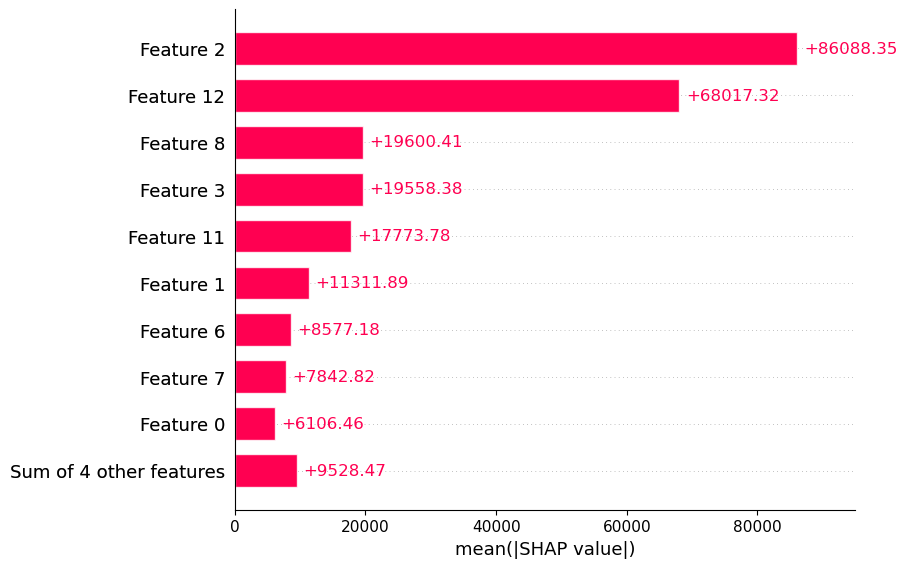

In [36]:
# Explainer SHAP

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

#Moyenne SHAP
shap.plots.bar(shap_values)

Nous pouvons constater ici l'impact des différentes variables dans notre modélisation. Cette étape est importante pour avoir une meilleure connaissance de l'impact de chacune des variables. Cela peut nous permettre un ajustement dans notre phase de préparation des données.

## Conclusion

En conclusion, notre projet de prédiction des prix immobiliers dans l'état de Washington a abouti à des résultats significatifs et satisfaisants. Nous avons réussi à répondre à la problématique complexe de la prédiction des prix de l'immobilier en utilisant des méthodes avancées de modélisation. Voici les points clés de notre projet :

Tout d'abord, nous avons entrepris une étape approfondie d'exploration de nos données et de feature engineering. Cette phase cruciale nous a permis de mieux comprendre la nature de nos variables, d'identifier les corrélations et de créer de nouvelles caractéristiques qui ont enrichi nos données. Grâce à ces efforts, nous avons pu mieux préparer notre jeu de données pour la modélisation.

Ensuite, nos modèles de prédiction ont atteint un niveau de performance notable, avec le meilleur résultat se situant autour de 0,70. Ce score représente un résultat convaincant, démontrant la capacité de nos modèles à capturer les tendances et les schémas dans les données immobilières complexes. Ces résultats témoignent de l'efficacité des méthodes que nous avons utilisées et de la pertinence de notre approche.

L'optimisation de notre modèle a également été un point crucial de notre projet. En particulier, nous avons concentré nos efforts sur l'amélioration de notre modèle LightGBM en travaillant sur trois paramètres clés. Cette approche d'optimisation a porté ses fruits, contribuant à une amélioration significative de nos scores de prédiction. Cela démontre l'importance de l'ajustement fin des paramètres pour obtenir les meilleurs résultats possibles.

Enfin, nous reconnaissons qu'il existe des axes d'amélioration pour notre modélisation. Une meilleure connaissance des rénovations effectuées sur les bâtiments pourrait fournir des informations précieuses pour affiner notre modèle et mieux capturer les variations des prix. De plus, l'obtention de davantage de données, en particulier en ce qui concerne les caractéristiques spécifiques des différentes villes, pourrait permettre une modélisation plus précise et détaillée.

En somme, notre projet de prédiction des prix immobiliers a été couronné de succès, combinant une exploration approfondie des données, une modélisation avancée et une optimisation rigoureuse pour obtenir des résultats probants. Les leçons tirées de ce projet nous serviront de base solide pour aborder d'autres défis complexes dans le domaine de la science des données.